<a href="https://www.kaggle.com/code/karan842/500-species-classification-cnn-w-b-92?scriptVersionId=119952705" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Bird Species Classification over 500 bird species

### Classifying 500 bird species using CNN architecutre

*In this notebook I am going to build CNN architecture for classifying 500 species of Birds*

- **We will perform some fundmental steps to build CNN model**:

   
   1. Importing libraries: Importing some necessary libraries which are needed for this project
   2. Setting [Weights & Biases](https://wandb.ai/home/) to track the experiemnts 
   3. Loading an image directory and converting them into dataframe with labels as a target species
   4. EDA: Analyzing the target classes and displaying sample set of images.
   5. Data Preprocessing: Performing Data Augmentation, resizing, rescaling 
   6. Building CNN model using Keras Pre-trained models
   7. Tracking the experiments using W&B
   8. Evaluating the model in a detail
  
 
 ## Notebook Extension:
 
 > I am going to create a end to end application either using FastAPI or Streamlit to deploy the model in real world environmet using MLOps. Click about GitHub link to know more

**[GitHub Link](https://github.com/karan842/bird-species-classification/)**

# Importing libraries

In [1]:
# Classic data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import PIL
from sklearn.model_selection import train_test_split

# tensorflow libaries
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Conv2D, BatchNormalization,MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras import optimizers
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV2, VGG19
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import tqdm
import warnings
import glob
import os

# Metrics
from sklearn import metrics
import itertools

# WANDB 
import wandb
wandb.login()

# Noteboook setting
%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# Load and transform data

In [2]:
dataset = '/kaggle/input/100-bird-species/train/'

In [3]:
species_types=os.listdir(dataset)
species_types

['DALMATIAN PELICAN',
 'WATTLED CURASSOW',
 'AMERICAN WIGEON',
 'CARMINE BEE-EATER',
 'GAMBELS QUAIL',
 'UMBRELLA BIRD',
 'AMERICAN KESTREL',
 'AMERICAN GOLDFINCH',
 'BLUE GROSBEAK',
 'PALM NUT VULTURE',
 'DUSKY LORY',
 'AUCKLAND SHAQ',
 'BLACK THROATED WARBLER',
 'YELLOW CACIQUE',
 'STRIPPED SWALLOW',
 'VERMILION FLYCATHER',
 'CAPE MAY WARBLER',
 'RED TAILED HAWK',
 'GURNEYS PITTA',
 'INDIAN ROLLER',
 'SNOW GOOSE',
 'GREEN WINGED DOVE',
 'AZURE TANAGER',
 'GREEN MAGPIE',
 'BANDED BROADBILL',
 'AFRICAN PYGMY GOOSE',
 'INDIGO FLYCATCHER',
 'GREY PLOVER',
 'TOUCHAN',
 'HYACINTH MACAW',
 'HARLEQUIN DUCK',
 'ABYSSINIAN GROUND HORNBILL',
 'CALIFORNIA QUAIL',
 'BALD IBIS',
 'WOOD THRUSH',
 'RUBY THROATED HUMMINGBIRD',
 'INDIGO BUNTING',
 'ALBERTS TOWHEE',
 'SORA',
 'HOODED MERGANSER',
 'ROSEATE SPOONBILL',
 'CAPE ROCK THRUSH',
 'BLUE COAU',
 'CALIFORNIA CONDOR',
 'BORNEAN PHEASANT',
 'BARN SWALLOW',
 'TAIWAN MAGPIE',
 'SPLENDID WREN',
 'RED BILLED TROPICBIRD',
 'BLACK THROATED BUSHTIT',
 'CH

## Placing data into a DataFrame

In [4]:
image_dir = Path(dataset)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))

# print(labels)

In [5]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels,name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels],axis=1)
image_df

Filepath              Label
0      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
1      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
2      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
3      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
4      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
...                                                  ...                ...
80080  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE
80081  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE
80082  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE
80083  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE
80084  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE

[80085 rows x 2 columns]

# Exploratory Data Analyis

In [6]:
image_df['Label'].value_counts(ascending=False)

HOUSE FINCH                248
OVENBIRD                   233
D-ARNAUDS BARBET           233
SWINHOES PHEASANT          217
WOOD DUCK                  214
                          ... 
AMETHYST WOODSTAR          131
MASKED LAPWING             131
PATAGONIAN SIERRA FINCH    130
RED TAILED THRUSH          130
SNOWY PLOVER               130
Name: Label, Length: 500, dtype: int64

- Count of each class is ranging between 248 to 130

## Top 100 most occured Bird Species

## Visualizing sample images from dataset

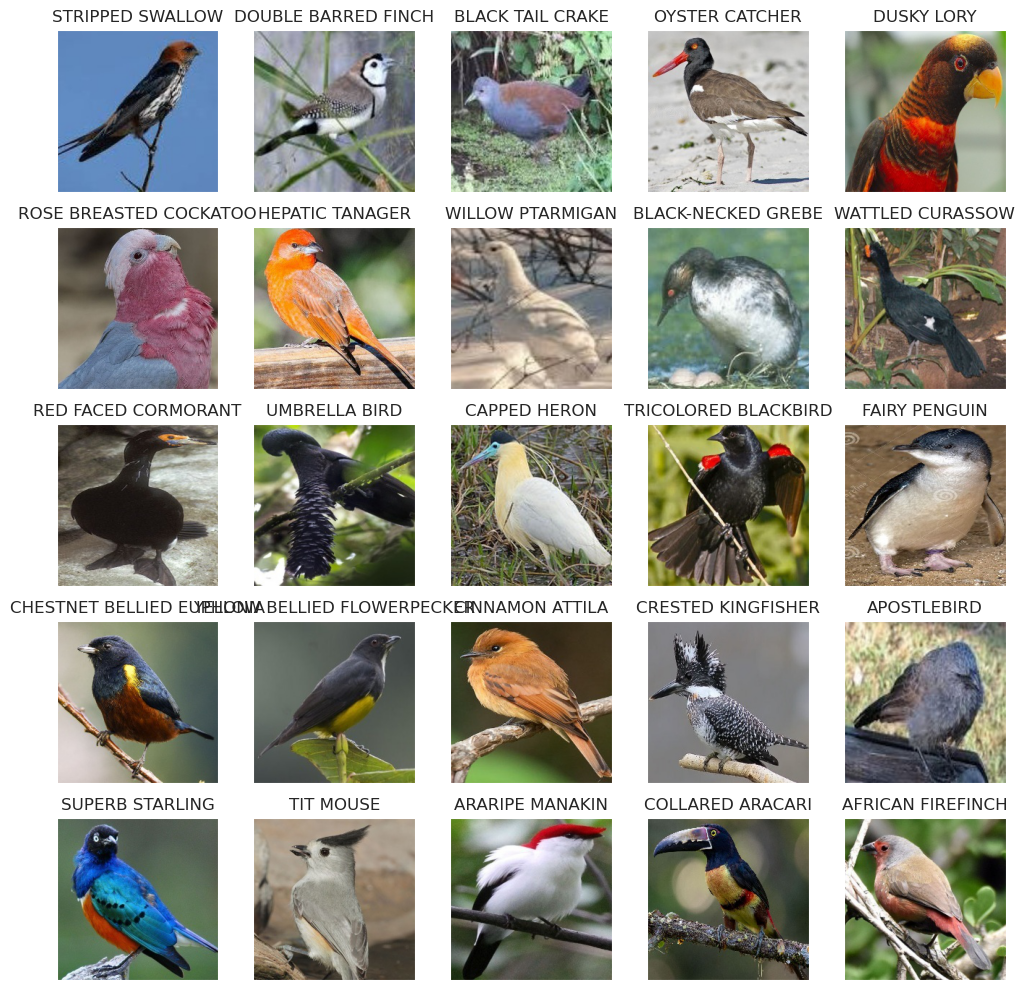

In [7]:
random_index = np.random.randint(0,len(image_df),25)
fig, axes = plt.subplots(nrows=5,ncols=5,figsize=(10,10),
                        subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show();

## Data Preprocssing
The data will be split into three different categories: Training, Validation and Testing. The training data will be used to train the deep learning CNN model and its parameters will be fine tuned with the validation data. Finally, the performance of the data will be evaluated using the test data(data the model has not previously seen).

In [8]:
# Seperate in train and test data
train_df, test_df = train_test_split(image_df, test_size=0.2,
                                     shuffle=True,random_state=42)

### Data Augmentation 

In [9]:
# train_gen = ImageDataGenerator(
#     rotation_range = 15,
#     width_shift_range = 0.05,
#     height_shift_range = 0.05,
#     rescale = 1./255,
#     shear_range = 0.05,
#     brightness_range = [0.1,1.5],
#     horizontal_flip = True,
#     vertical_flip = True
# )

train_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [10]:
# Split the data into three categories
train_images = train_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_gen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 51255 validated image filenames belonging to 500 classes.
Found 12813 validated image filenames belonging to 500 classes.
Found 16017 validated image filenames belonging to 500 classes.


In [11]:
# Resize Layer
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(224,224),
    layers.experimental.preprocessing.Rescaling(1./255),
])

## Training the model

In [12]:
base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

base_model.trainable=False

9406464/9406464 [==============================] - 1s 0us/step


In [13]:
inputs = base_model.input
x = resize_and_rescale(inputs)
x = Dense(256, activation='relu')(base_model.output)
x = Dropout(0.2)(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(500,activation='softmax')(x)

model =  Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

## Weights and Biases configuration

In [14]:
# Run 
from wandb.keras import WandbCallback
run = wandb.init(project='birds-species-classification',
                config={ # include hyperparameters and metadata
                    "learning_rate":0.0001,
                    "epochs":100,
                    "batch_size":32,
                    "es_patience":5,
                    "loss_function":"categorical_crossentropy",
                    
                })
config = wandb.config # we will use this to configure our experiment
tf.keras.backend.clear_session()

# model callbacks, optimizers and compilation

## Optimizer
optimizer = tf.keras.optimizers.Adam(config.learning_rate)

## Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=config.es_patience,
                              restore_best_weights=True)
# Create checkpoint callback
checkpoint_path = "birds_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

# Model compile
model.compile(optimizer,config.loss_function,metrics=['accuracy'])

wandb: Currently logged in as: karan842. Use `wandb login --relogin` to force relogin


In [15]:
history = model.fit(
    train_images, 
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=config.epochs,
    callbacks=[
        early_stopping,
        WandbCallback(),
        checkpoint_callback,
    ]
)

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/100
1602/1602 [==============================] - 679s 418ms/step - loss: 4.7019 - accuracy: 0.1251 - val_loss: 2.6085 - val_accuracy: 0.4826 - _timestamp: 1677050150.0000 - _runtime: 699.0000
Epoch 2/100
1602/1602 [==============================] - 205s 128ms/step - loss: 2.5775 - accuracy: 0.3850 - val_loss: 1.6643 - val_accuracy: 0.6423 - _timestamp: 1677050355.0000 - _runtime: 904.0000
Epoch 3/100
1602/1602 [==============================] - 208s 130ms/step - loss: 1.9214 - accuracy: 0.5171 - val_loss: 1.3022 - val_accuracy: 0.7118 - _timestamp: 1677050563.0000 - _runtime: 1112.0000
Epoch 4/100
1602/1602 [==============================] - 208s 130ms/step - loss: 1.5790 - accuracy: 0.5946 - val_loss: 1.1122 - val_accuracy: 0.7373 - _timestamp: 1677050771.0000 - _runtime: 1320.0000
Epoch 5/100
1602/1602 [==============================] - 213s 133ms/step - loss: 1.3653 - accuracy: 0.6427 - val_loss: 0.9949 - val_accuracy: 0.7595 - _timestamp: 1677050984.0000 - _runtime: 1533.00

# Model Evaluation

In [17]:
results = model.evaluate(test_images)
print("    Test Loss: {:.5f}%".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))

501/501 [==============================] - 48s 96ms/step - loss: 0.6272 - accuracy: 0.8384
    Test Loss: 0.62719%
Test Accuracy: 83.84%


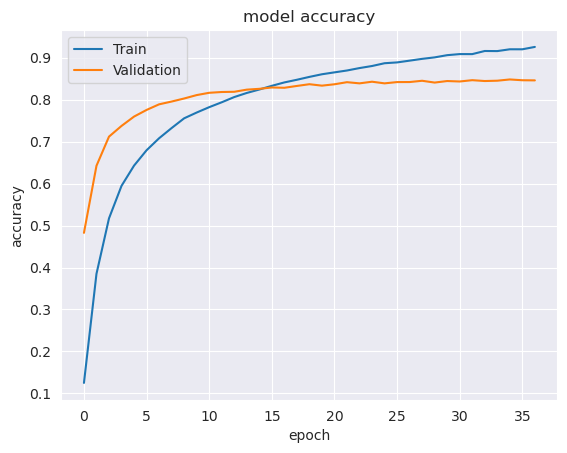

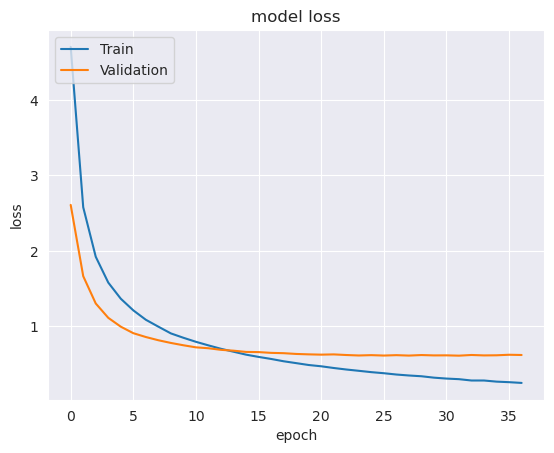

In [18]:
def plot_loss_accuracy_curves(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show();
    
plot_loss_accuracy_curves(history)

## Making predictiong on the test data

Predict the label of test_images

In [19]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
pred

501/501 [==============================] - 49s 96ms/step


array([233, 258,  19, ..., 283, 139, 433])

In [20]:
# train_images.class_indices

Map the label

In [21]:
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Result
print(f'First 5 predictions: {pred[:5]}')

First 5 predictions: ['GOLDEN CHLOROPHONIA', 'GREY HEADED FISH EAGLE', 'AMERICAN KESTREL', 'LITTLE AUK', 'CAMPO FLICKER']


### Display 25 Random images from dataset with their labels and predict with the model

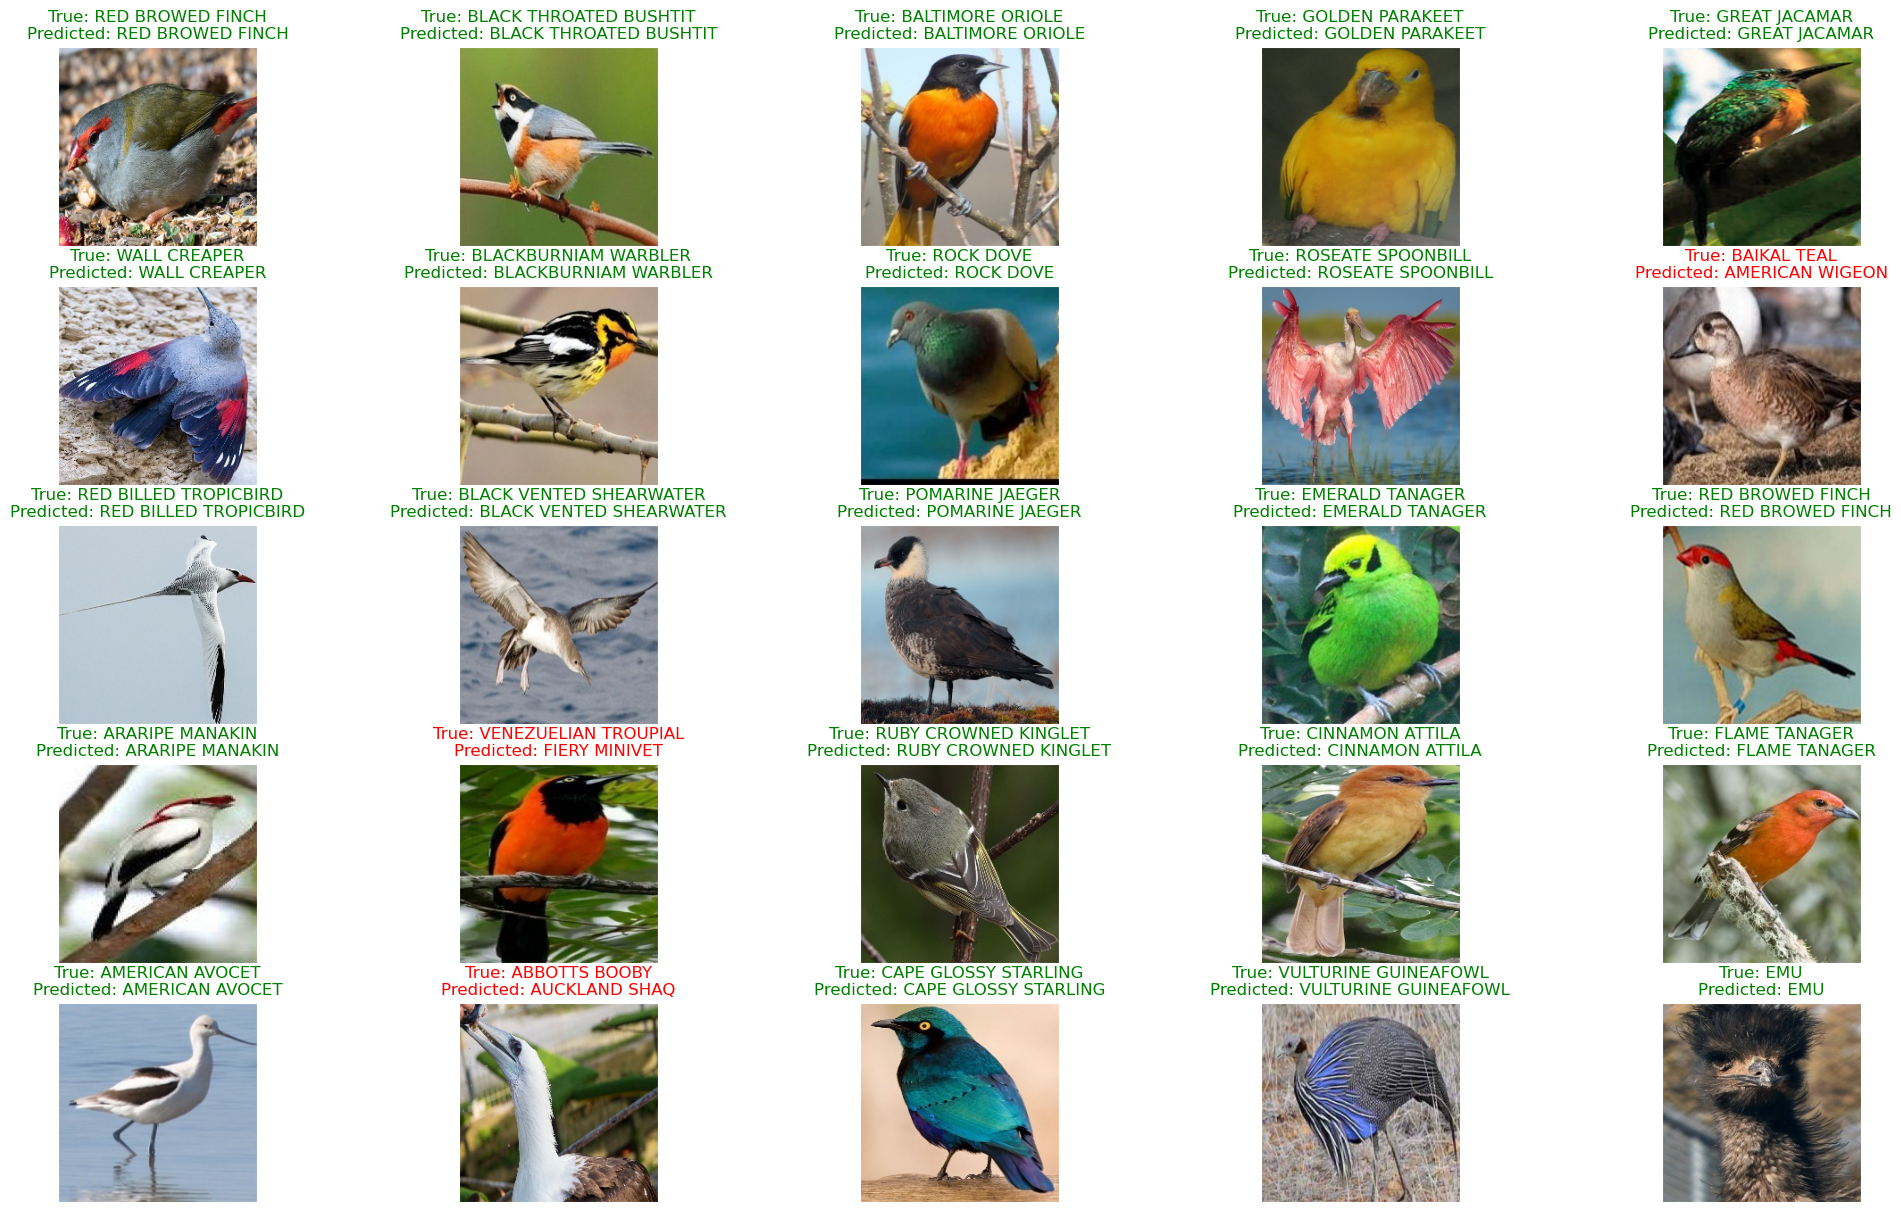

<Figure size 640x480 with 0 Axes>

In [22]:
random_index = np.random.randint(0,len(test_df)-1,25)
fig, axes = plt.subplots(nrows=5, ncols=5,figsize=(25,15),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}",
                color=color)

plt.show()
plt.tight_layout()

## Classification Report
We will convert our classification report into dataframe and find the best and worst classes using pandas operations for ease.

In [23]:
species = test_images.class_indices

In [24]:
y_test = list(test_df.Label)
report = metrics.classification_report(y_test, pred,target_names=species,output_dict=True)

data = []
for k,v in report.items():
    if k in species:
        data.append({'species':k,
                    'precision': v['precision'],
                    'recall': v['recall'],
                    'f1-score': v['f1-score'],
                    'support': v['support']})
df = pd.DataFrame(data)
df

species  precision    recall  f1-score  support
0                ABBOTTS BABBLER   0.777778  0.451613  0.571429       31
1                  ABBOTTS BOOBY   0.562500  0.529412  0.545455       34
2     ABYSSINIAN GROUND HORNBILL   0.972222  0.921053  0.945946       38
3          AFRICAN CROWNED CRANE   1.000000  1.000000  1.000000       18
4         AFRICAN EMERALD CUCKOO   0.710526  0.818182  0.760563       33
..                           ...        ...       ...       ...      ...
495                  WOOD THRUSH   0.666667  0.857143  0.750000       35
496                      WRENTIT   0.789474  0.769231  0.779221       39
497  YELLOW BELLIED FLOWERPECKER   0.840000  0.583333  0.688525       36
498               YELLOW CACIQUE   0.600000  0.875000  0.711864       24
499      YELLOW HEADED BLACKBIRD   0.928571  0.812500  0.866667       32

[500 rows x 5 columns]

# Above code is under development :)

### Lets see which TOP-10 classes has good and bad Precision/Recall/F1-Scores
F1-Score is a harmonic mean between **Precision and Recall**(trade-off). So, we will classes based on f1-score   

In [36]:
def best_classes(df):
    print("Classed with good result: ")
    top_10_good = df.nlargest(10,'f1-score')
    res = top_10_good[['species','precision','recall','f1-score','support']]
    return res
    
best_classes(df)

Classed with good result: 


species  precision    recall  f1-score  support
3    AFRICAN CROWNED CRANE   1.000000  1.000000  1.000000       18
78              BLACK SWAN   1.000000  1.000000  1.000000       28
90          BLOOD PHEASANT   1.000000  1.000000  1.000000       32
283         HYACINTH MACAW   1.000000  1.000000  1.000000       26
321           LOONEY BIRDS   1.000000  1.000000  1.000000       33
329           MANDRIN DUCK   1.000000  1.000000  1.000000       30
461                TOUCHAN   1.000000  1.000000  1.000000       29
480           WALL CREAPER   1.000000  1.000000  1.000000       34
174             CUBAN TODY   1.000000  0.969697  0.984615       33
341         NICOBAR PIGEON   0.969697  1.000000  0.984615       32

In [37]:
def worst_classes(df):
    print("Classed with bad result: ")
    top_10_bad = df.nsmallest(10,'f1-score')
    res = top_10_bad[['species','precision','recall','f1-score','support']]
    return res
    
worst_classes(df)

Classed with bad result: 


species  precision    recall  f1-score  support
333          MASKED BOOBY   0.434783  0.500000  0.465116       20
464  TRICOLORED BLACKBIRD   0.619048  0.419355  0.500000       31
40          AUCKLAND SHAQ   0.477273  0.552632  0.512195       38
227        GILDED FLICKER   0.500000  0.529412  0.514286       17
249          GREAT XENOPS   0.666667  0.437500  0.528302       32
348      NORTHERN GOSHAWK   0.653846  0.459459  0.539683       37
1           ABBOTTS BOOBY   0.562500  0.529412  0.545455       34
214            FAIRY TERN   0.681818  0.483871  0.566038       31
0         ABBOTTS BABBLER   0.777778  0.451613  0.571429       31
31                ANTBIRD   0.516129  0.640000  0.571429       25

## Predict the bird

In [35]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions, preprocess_input



def predict_bird_species(model,img_path):
    
    # load the image
    img = load_img(img_path,target_size=(224,224))
    
    # convert the image to numpy array
    img_array = img_to_array(img)
    
    # preprocess the image for MobileNet model
    img_array = preprocess_input(img_array)
    
    # Make a prediction on the image
    predictions = model.predict(np.array([img_array]))
    
    # Decode the prediction results
    top_preds = decode_predictions(predictions, top=1)
    
    # Return the predicted class name
    return top_preds[0][0][1]
    

sample_img = '/kaggle/input/100-bird-species/valid/AZURE TIT/2.jpg'
predict_bird_species(model,sample_img)

1/1 [==============================] - 0s 24ms/step


ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 500)

## We will see the top-k accuracy of classes

Evaluating a classification model based on top-k accuracy is a useful approach when dealing with a large number of classes. Top-k accuracy measures the percentage of times that the correct label is among the top-k predicted labels. This is particularly useful for large classification problems, where the correct label may not be the highest predicted class.

> Note: Note that the top-k accuracy will typically be lower than the overall accuracy of the model, but it provides a more realistic evaluation metric for problems with a large number of output classes.

In [ ]:
y_true = [0, 1, 2, 3, 4]
y_pred = [5,2,7,1,3]

y_pred = np.array(y_pred)
print(y_pred.argsort()[:])

In [43]:
pred

['GOLDEN CHLOROPHONIA',
 'GREY HEADED FISH EAGLE',
 'AMERICAN KESTREL',
 'LITTLE AUK',
 'CAMPO FLICKER',
 'PAINTED BUNTING',
 'CHUCAO TAPACULO',
 'RED SHOULDERED HAWK',
 'SCARLET IBIS',
 'BLACK-THROATED SPARROW',
 'BROWN HEADED COWBIRD',
 'HORNED LARK',
 'SNOW GOOSE',
 'HOUSE FINCH',
 'GOLDEN PARAKEET',
 'CINNAMON TEAL',
 'JABIRU',
 'VULTURINE GUINEAFOWL',
 'DUSKY LORY',
 'STRIATED CARACARA',
 'KAGU',
 'STRIPPED MANAKIN',
 'BLACK COCKATO',
 'ANDEAN SISKIN',
 'GREATOR SAGE GROUSE',
 'BROWN HEADED COWBIRD',
 'HARLEQUIN QUAIL',
 'ANDEAN GOOSE',
 'IWI',
 'OKINAWA RAIL',
 'HOUSE SPARROW',
 'GOLDEN EAGLE',
 'CHATTERING LORY',
 'PHILIPPINE EAGLE',
 'BOBOLINK',
 'CAPE GLOSSY STARLING',
 'NOISY FRIARBIRD',
 'HORNED LARK',
 'BLACK-THROATED SPARROW',
 'RED WINGED BLACKBIRD',
 'RED FACED WARBLER',
 'BLUE GROSBEAK',
 'CRESTED WOOD PARTRIDGE',
 'KILLDEAR',
 'TAWNY FROGMOUTH',
 'SAYS PHOEBE',
 'VERMILION FLYCATHER',
 'GO AWAY BIRD',
 'GOLDEN PARAKEET',
 'CAATINGA CACHOLOTE',
 'BEARDED REEDLING',
 'GU

In [47]:
# Define a function to calculate top-k accuracy
def top_k_accuracy(predictions, true_labels, k):
   # Convert predictions to a NumPy array
    predictions = np.array(predictions)
    
    # Sort the predictions by decreasing order of probability
    sorted_preds = np.argsort(predictions, axis=0)[::-1]
    
    # Calculate the number of correct predictions in the top-k
    num_correct = 0
    for i in range(len(true_labels)):
        if true_labels[i] in sorted_preds[i, :k]:
            num_correct += 1
    
    # Calculate the top-k accuracy
    accuracy = num_correct / len(true_labels)
    
    return accuracy

# Evaluate the model based on top-k accuracy
k = 3  # top-k value
accuracy = top_k_accuracy(pred, y_test, k)
print(f"Top-{k} Accuracy: {accuracy:.3f}")

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [39]:
k=10
top_k_accuracy = metrics.top_k_accuracy_score(y_test,pred,k=k)
print(f"Top-{k} Accuracy: {top_k_accuracy:.3f}")

ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'